# Gradients

refs: 
* https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/
* https://www.youtube.com/watch?reload=9&v=Ne3hjpP7KSI
* https://github.com/bhattbhavesh91/gradient-descent-variants
* math demonstrations:
    * https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated/278812 
    * https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d
    * https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

**TODO:**
* Look this explanation of beter cost function for logistic regression: https://www.internalpointers.com/post/cost-function-logistic-regression


In [1]:
import numpy as np
import random as rand

import  matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import make_classification, make_blobs, make_regression

from typing import List, Set, Dict, Tuple, Optional, Union

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Gradient descent


**TODO:** Review this terms:

* loss fucntion, cost function and hypothesis function
* Use as reference:
    * Elements of Statistical Learning,  <== This is a good reference of ML
    * https://www.deeplearningbook.org/  <== This is a goodreference for Deep Learning
    * https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing

> PS: Objective function they use the term J and apparently i smore common in deep learning. Loss is more common in statistics. The Objective function and J notation emphasized that we J is function of parameters and not data. The notation loss emphasized that the Loss function defines a mistake in machine learning and the goal of the ML algo is to minimize the mistakes. But also we can choose different ways to define the "mistakes", like LInera and losgits regression loss functions. Different models has different losses.  

In machine learning we define the loss fucntion $L = L(y, h_{\theta}(X))$. This function is reponsible to penalize mistakes. The machine learning algorithm learns by minimizing this function. $\theta$ are the paremeters of the models, $X$ is the trainning data and $y$ are the labels. The term $h_{\theta}(X)$ is the hypothesis.  We define the cost function $J(\theta) = L(y, h_{\theta}(X))$. Notices that the cost function $J(\theta)$ depends of the trainning data $X$, $y$ as well, but is considered only a function of the parameters $\theta$. Bellow is cost funtion example for Multiple Linear Regression:

$
J(\theta) =  \frac{1}{2n} \left ( X \theta - y \right )^t\left ( X \theta - y \right )
$

where $h_{\theta}(X) = X \theta$.

From calclulus, 

$
d J(\theta) = \nabla_{\theta} J(\theta) * d\theta
$

where $*$ is the scalar product or inner product. Because the $cos(a)$ function is maximun when $a=0$ ($d\theta$ and $\nabla_{\theta}$ are aligned in this situation), we know that the opposite direction of the gradient point to the direction that minimizes the cost function $J(\theta)$.

> PS: The opposite direction $\nabla_{\theta}J(\theta)$ minimizes the cost function. The gradient is a compass that instead of point North, it is always point downhill.


The algorithm is summarized as follow:
    
1. Start from a random point $\theta = \theta_0$

1. Repeat the steps

    1. update direction (find the direction to minimize $J(\theta)$): $\Delta \theta = -\eta \nabla_{\theta}J(\theta)$
    
    1. update the position (keep changing the parameters to minimize $J(\theta)$): $\theta = \theta + \Delta \theta$
    
where $\eta$ is the learning rate. 



## Examples of cost functions and their gradients

### Linear Rgression

$
J(\theta) = \frac{1}{2n} \sum_i^n \left ( h_{\theta}(x_i) - y_i \right )^2
$

$
J(\theta) = \frac{1}{2n} \left ( X \theta - y \right )^t\left ( X \theta - y \right )
$


$
\nabla_{\theta}J(\theta) = X^t \left ( X\theta - y \right )
$

In [2]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_linear_regression(theta, X, y):
    
    n = X.shape[0]
    
    z = np.dot(X,theta) - y

    return np.dot(z.T,z)/2/n

def gradient_linear_regression(theta,X,y):
    
    z = np.dot(X,theta) - y    
    grad = np.matmul(X.T,z)
    
    #print(f"theta.shape: {theta.shape}; X.shape: {X.shape}; z.shape: {z.shape}; grad.shape: {grad.shape}")
    
    return grad

(300, 1)

(300,)

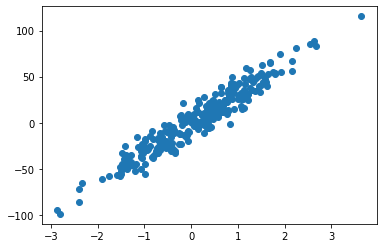

In [3]:
X, y = make_regression(n_samples = 300, 
                       n_features=1, 
                       n_informative=1, 
                       noise=10,
                       random_state=2021)
X.shape
y.shape
#plt.scatter(X[:,0],X[:,1])
plt.scatter(X,y)

### Logistic Regression Sigmoid activation

* vectorized formula of the cost function: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

$
J(\theta) = \frac{1}{n} \sum_i^n \left ( y^i log(h_{\theta}(x_i)) - (1 - y_i) log(1 - h_{\theta}(x_i)) \right ) \\
J(\theta) = - \frac{1}{n} \left ( y^t log(h(X\theta)) + (1 - y)^t log(1 - h(X\theta))  \right )
$

$
\nabla_{\theta}J(\theta) = X^t \left ( \sigma(X\theta) - y) \right )
$

where:

$
h(X\theta) = h(z) = \sigma(z) \equiv \frac{1}{1 + e^{-z}} \\
\frac{\partial}{\partial z} \sigma(z) = \sigma(z) (1 - \sigma(z))  \\
$


In [4]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_logistic_regression(theta, X, y):
    
    n = X.shape[0]
    z = np.dot(X,theta)  # nx1
    h = 1.0/(1.0 + np.exp(-z))  # activation: nx1
    
    cost = (-1.0/n)*(y^t*np.log(h) + (1-y)^t*(np.log(1-h))) # scalar
    
    return cost

def gradient_logistic_regression(theta,X,y):
    
    z = np.dot(X,theta)
    h = 1.0/(1.0 + np.exp(-z))  # activation
    
    return np.matmul(X.T,h - y)

## Batch Gradient descent



Batch gradient descent computes the gradient using the whole dataset. 

In [5]:
def gradient_descent(X,y, cost_func, gradient_func, learning_rate = 0.01, n_iterations = 100):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    theta_history = np.zeros((n_iterations,d))
    grad_history = np.zeros((n_iterations,d))
    cost_history = np.zeros(n_iterations)
    
    # init guess
    theta = np.random.randn(d)
    cost_at_theta = cost_func(theta,X,y)
    gradient_at_theta = gradient_func(theta,X,y)
    
    theta_history[0, :] = theta.T
    grad_history[0,:] = gradient_at_theta.T
    cost_history[0] = cost_at_theta
    
    #print(f"theta0: {theta}")
    for it in range(1,n_iterations):

        # computebgradients and cost function
        cost_at_theta = cost_func(theta,X,y)
        gradient_at_theta = gradient_func(theta,X,y)

        # update parameters
        dtheta = -learning_rate* gradient_at_theta
        theta = theta + dtheta
        
        # log history for oploting
        theta_history[it, :] = theta.T
        grad_history[it,:] = gradient_at_theta.T
        cost_history[it] = cost_at_theta
        
        #print(f"{it}: => theta: {theta.T}; grad: {gradient_at_theta.T}; cost: {cost_at_theta} ")
        #print(f"{it}: => theta.shape: {theta.shape}; grad.shape: {gradient_at_theta.shape}; cost: {cost_at_theta} ")

    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

### Training 

In [6]:
%%time
lr = 0.005
n_iter = 100

theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")



Initial Guess it: 0 => theta: [-0.51742453]; grad: [-9900.92299865]; cost: 580.44
it: 99 => theta: [31.96161862]; grad: [-1.13242749e-13]; cost: 44.49
CPU times: user 874 µs, sys: 4.78 ms, total: 5.65 ms
Wall time: 3.74 ms


### Checking the fit

We can inspect our solution by ploting the prediction against the data.

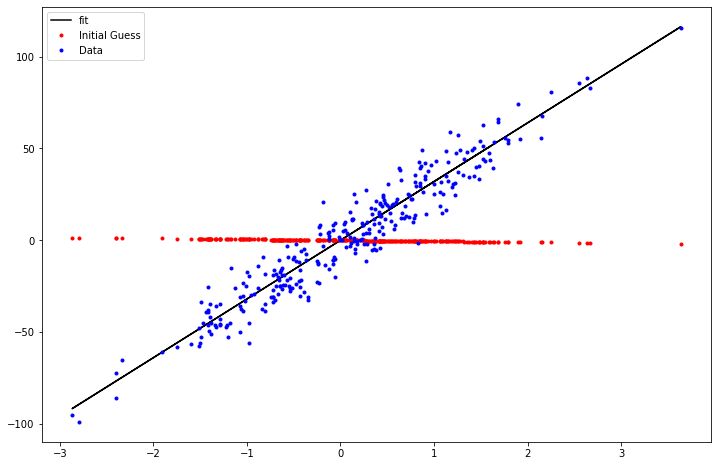

In [7]:
y_pred0 = np.dot(X,theta0)
y_pred = np.dot(X,theta)

fig,ax = plt.subplots(figsize=(12,8))
_= ax.plot(X,y_pred,c='black', label='fit');
_= ax.plot(X,y_pred0,'r.', label='Initial Guess');
_= ax.plot(X,y,'b.', label='Data');
ax.legend();

### Cost Function and  learning rate 

In [8]:
%%time
lr = 0.00657
n_iter = 100

theta_big, history_big = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

lr = 1e-5
n_iter = 100

theta, history_small = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

CPU times: user 2.94 ms, sys: 3.33 ms, total: 6.28 ms
Wall time: 4.23 ms


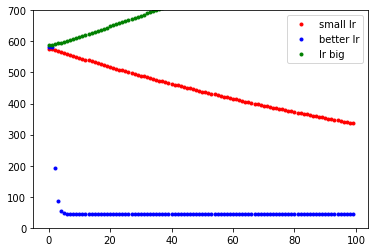

In [9]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history_small['cost'],'r.',label='small lr');
_ = ax.plot(range(n_iter),history['cost'],'b.',label='better lr');
_ = ax.plot(range(n_iter), history_big['cost'], 'g.', label="lr big");
_ = ax.set_ylim([0, 700])
ax.legend();

### Visualizing gradients in 2d with vector foelds

**TODO:** This later

* 2d example with vector field
https://stackoverflow.com/questions/63843310/how-to-plot-gradient-vector-on-contour-plot-in-python

plot vector field
https://krajit.github.io/sympy/vectorFields/vectorFields.html

In [10]:
# n = 300
# d = 2
# X, y = make_regression(n_samples = n, 
#                        n_features= d, 
#                        n_informative=1, 
#                        noise=10,
#                        random_state=2021)
# X.shape
# y.shape

In [11]:
# x1 = np.arange(-5,5,0.1)
# x2 = np.arange(-5,5,0.1)

# X1,X2 = np.meshgrid(x1,x2)

# Y = np.exp(-0X)

$
J(\theta_1, \theta_2) = A(\theta_1^2 + \theta_1 + \theta_2^2) - C e^{-\frac{1}{2\sigma^2} \left [ (\theta_1 - \mu_1)^2 + (\theta_2 - \mu_2)^2 \right ]}
$

$
\nabla_{\theta}J(\theta) = \frac{\partial}{\partial \theta_1 } J(\theta) \hat{\theta_1} + \frac{\partial}{\partial \theta_2 } J(\theta) \hat{\theta_2} \\

\frac{\partial}{\partial \theta_1 } J(\theta) = 

$

where:

$
h(X\theta) = h(z) = \sigma(z) \equiv \frac{1}{1 + e^{-z}} \\
\frac{\partial}{\partial z} \sigma(z) = \sigma(z) (1 - \sigma(z))  \\
$


In [50]:
from matplotlib import cm

def gen_function():
    
    A = 0.1
    C = -5.0
    
    mu_1 = 3
    mu_2 = 4
    sigma = 1.0    
    
    def cost_function(theta, X=None, y=None):

        theta1 = theta
        theta2 = theta.T
        
        #A = 0.1
        cost = A*(theta1**2 + theta1 + theta2**2)

    #     mu_x = 3
    #     mu_y = 4
    #     sigma = 1.0
        #C = -5.0
        cost += C*np.exp(-0.5*((theta1-mu_1)**2 + (theta2-mu_2) ** 2)/sigma)

        return cost

    def gradient(theta,X,y):

        theta_1 = theta[0]
        theta_2 = theta[0]
        
        gaussian_cost = C*np.exp(-0.5*((theta1-mu_1)**2 + (theta2-mu_2) ** 2)/sigma)
        # dJ/dtheta_1 
        grad_theta1 = A*(2.0*theta1 + theta1) - (theta1-mu_1)/sigma* gaussian_cost
        grad_theta2 = A*2.0*theta2 - (theta2-mu_2)/sigma* gaussian_cost
        
        return grad_theta2
    
    return cost_function, gradient

cost_function, gradient = gen_function()

theta1 = np.linspace(-7, 7, 25)
theta2 = np.linspace(-7, 7, 25)

theta1.shape

# theta = np.vstack((theta1.T,theta2.T))
# theta.shape

Theta1, Theta2 = np.meshgrid(theta1, theta2)

#J = cost_function(Theta1, Theta2)

# Theta = np.vstack((Theta1,Theta2))

X = np.array([])
y = np.array([])
J = cost_function(Theta1, X,y)

Theta1.shape
Theta2.shape
J.shape


(25,)

(25, 25)

(25, 25)

(25, 25)

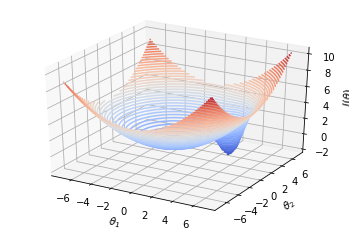

In [51]:
fig = plt.subplot(121)
ax = plt.axes(projection='3d')
ax.contour3D(Theta1, Theta2, J, 50, cmap=cm.coolwarm)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$J(\theta)$');

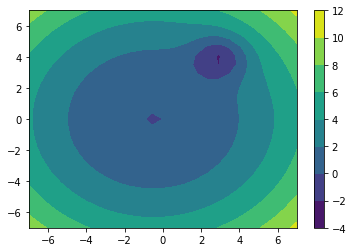

In [52]:
cp = plt.contourf(Theta1, Theta2, J)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
plt.show();

In [ ]:
X1
X2

X1.flatten()

In [ ]:
# %%time
lr = 0.001
n_iter = 100

X1.shape
X2.shape

x1.shape
x2.shape

X = np.vstack((X1.flatten(),X2.flatten()))

X.shape
Y.shape
y = Y.flatten()
y.shape


#theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

# print()
# theta0 = history['theta'][0]
# grad0 =  history['grad'][0]
# cost0 = history['cost'][0]

# print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

# it = n_iter -1
# theta = history['theta'][it]
# grad =  history['grad'][it]
# cost = history['cost'][it]

# print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")

In [ ]:
thetas = history['theta']
theta_min = np.min(thetas,axis=0)
theta_max = np.max(thetas,axis=0)

theta1,theta2 = np.meshgrid(np.linspace(theta_min[0],theta_max[0],n_iter),np.linspace(theta_min[1],theta_max[1],n_iter))

grads = 

# gradients
u = np.array([ grad[0]/np.norm(grad) for grad in history['grad']])
v = np.array([ grad[1]/np.norm(grad) for grad in history['grad']])

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)
ax.plot(theta1, theta2, c='k')
ax.quiver(x, y, u, v, units='xy', scale=0.5, color='gray')
ax.contour(x, y, z, 10, cmap='jet', lw=2)

In [ ]:
n = 3
d = 2

theta_history = np.zeros((n,d))

theta = np.random.randn(d)

theta.shape
theta

z = np.dot(X,theta)

z.shape

theta_history.shape

theta_history[0,:] = theta.T


theta_history